In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2, t, f, norm
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

# Задание 1
### 1. Реализовать генератор схемы Бернулли с заданной вероятностью успеха $p$. На основе гегнератора схемы Бернулли построить датчик для биномиального распределения.


## Схема Бернулли

In [2]:
#генератор схемы Бернулли размера size и вероятностью успеха p
def bern(p, size):
    if (p > 1 or p < 0):
        print('p = ', p, 'вне допустимого отрезка [0, 1]')
        return "error"
    return (np.random.random_sample(size) <= p).astype(int)

In [3]:
#определение параметров
p = 0.4;
size = 1000;

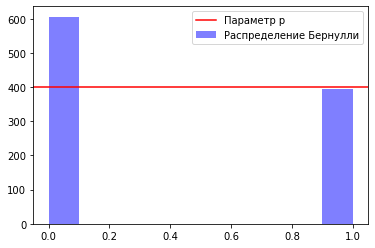

In [4]:
#иллюстрация работы датчика
plt.hist(bern(p, size), color = 'b', alpha = 0.5, label = "Распределение Бернулли")
plt.axhline(p*size, color = "red", label = "Параметр p")
plt.legend()
plt.show()

## Датчик биномиального распределения

In [5]:
#датчик биномиального распределения размера size 
#c вероятностью успеха p и числом испытаний n 
def binom(p, n, size):
    if (p > 1 or p < 0):
        print('p = ', p, 'вне допустимого отрезка [0, 1]')
        return "error"
    if (type(size) == int):
        return (bern(p, (n, size))).sum(0)
    else:
        return (bern(p, (n,) + size)).sum(0)

In [6]:
#определение параметров
p = 0.4
n = 1000
size = 100000

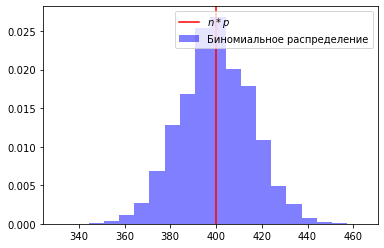

In [7]:
#иллюстрация работы датчика
plt.hist(binom(p, n, size), bins = 20, color = 'b', alpha = 0.5, density = True, label = "Биномиальное распределение")
plt.axvline(p * n, color = "r", label = r"$n * p$")
plt.legend()
plt.show()

### 2. Реализовать генератор геометрического распределения. Проверить для данного распределения свойство отсутствия памяти.

## Генератор геометрического распределения

In [8]:
#датчик геометрического распределения размера size 
#с вероятностью успеха p
def geom(p, size):
    if (p > 1 or p < 0):
        print('p = ', p, 'вне допустимого отрезка [0, 1]')
        return "error"
    lam = -np.log(1 - p)
    u = np.random.random_sample(size)
    return np.floor(np.divide(-np.log(np.ones(size) - u), lam))

In [9]:
#определение параметров
p = 0.3
size = 100000

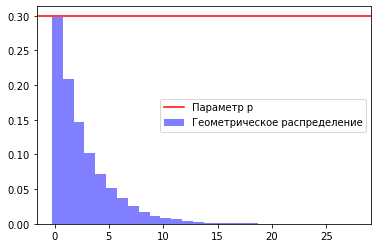

In [10]:
#иллюстрация работы датчика
g = geom(p, size)
plt.hist(g, bins = np.arange(-0.25, np.max(g), 1), density = True, color = 'b', alpha = 0.5, label = "Геометрическое распределение")
plt.axhline(p, c = 'r', label = "Параметр p")
plt.legend()
plt.show()


Проверка свойства отсутствия памяти

In [11]:
#определение шага по времени
tau = 5

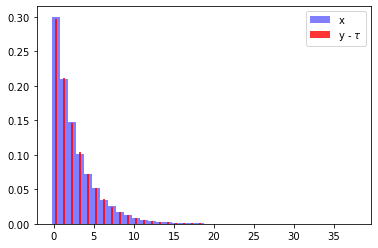

In [12]:
#проверка свойства отсутствия памяти (наложение гистограмм)
x = geom(p, size)
y = geom(p, int(size / ((1 - p)**tau)))
y = y[y >= tau][0 : size]

plt.hist(x, bins = np.arange(-0.25, np.max(x), 1), density = True, color = 'b', alpha = 0.5, label = 'x')
plt.hist(y - tau, bins = np.arange(-0.25, np.max(x), 1), density = True, color = 'r', alpha = 0.8, rwidth = 0.3, label = r'y - $\tau$')
plt.legend()
plt.show()

### 3. Рассмотреть игру в орлянку - бесконечную последовательность независимых испытаний с бросанием правильной монеты. Выигрыш $S_n$ определяется как сумма по всем $n$ испытаниям значений $-1$ и $1$ в зависимости от выпавшей стороны. Проиллюстровать (в виде ломанной) поведение нормированной суммы $Y(i) = \frac{S_n}  {\sqrt{n}}$, как функцию от номера испытания $i = 1, ..., n$ для одной отдельно взятой траектории. Дать теоретическую оценку для $Y(n)$ при $n \rightarrow \infty$.

In [13]:
#определение параметра
n = 1000

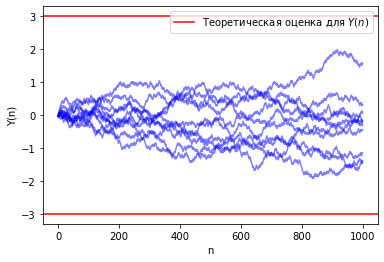

In [14]:
#проверка свойства отсутствия памяти
for i in range(0, 10):
    s_n = (2 * bern(0.5, n) - 1).cumsum()
    plt.plot(s_n / np.sqrt(n), c = 'b', alpha = 0.5)
plt.axhline(3, c = 'r', label = r"Теоретическая оценка для $Y(n)$")
plt.axhline(-3, c = 'r')
plt.xlabel(r'n')
plt.ylabel(r'Y(n)')
plt.legend()
plt.show()

# Задание 2.
### 1. Построить датчик сингулярного распределения, имеющий в качестве функции распределения канторову лестницу. С помощью критерия Колмогорова убедиться в корректности работы датчика.

## Сингулярное распределение с канторовой лестницей

Носителем распределения является канторова лестница. В троичной записи точек, принадлежащих канторову множеству отсутствует единица. Таким образом, можно задать каждый элемент множетсва (с заданной точностью) при помощи его троичной записи. Для этого сгенерируем схему Бернулли, заменяя $1$ на $2$. Полученная последовательность задает троичную запись числа, то есть, при переходе к десятичной системе счисления, будет получена случайная величина, распределенная сингулярно с канторовой лестницей в качестве функции распределения.

Для определения необходимой точности вычислений (длину генерируемой схемы Бернулли) положим точность $10^{-10}$. При переходе к троичной системе счисления получено, что необходимо вычислить $n = 10\frac{\ln 10}{\ln 3} \approx 21$ знаков после запятой.

In [15]:
#датчик сингулярного распределения с канторовой лестницей размера size
def sing(size):
    p_bern = 0.5
    n_bern = 21
    if (type(size) == int):
        x = 2 * (bern(p_bern, (n_bern, size)))
        y = (np.ones((n_bern, size)) / 3).cumprod(0)
    else:
        x = 2 * (bern(p_bern, (n_bern,) + size))
        y = (np.ones((n_bern,) + size) / 3).cumprod(0)
    return (x * y).sum(0)

In [16]:
#определение параметров
size = 10000

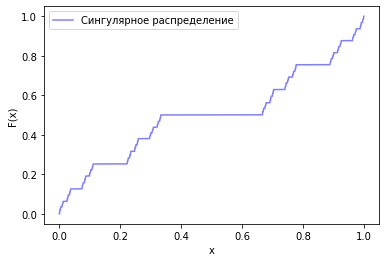

In [17]:
#иллюстрация работы датчика
from statsmodels.distributions.empirical_distribution import ECDF

sample = sing(size)

ecdf = ECDF(sample)
plt.plot(ecdf.x, ecdf.y, label = 'Сингулярное распределение', c = 'b', alpha = 0.5)
plt.xlabel(r'x')
plt.ylabel(r'F(x)')
plt.legend()
plt.show()

## Лестница Кантора

Зададим канторову лестницу аналитически для использования критерия Колмогорова.

Для аналитического построения канторовой лестницы представим x в троичной системе счисления. Если в троичной записи числа есть $1$, то выбросим все последующие цифры из записи и заменим все предшествующие $2$ на $1$. Полученная последовательность является записью значения канторовой лестницы в двоичной системе счисления

In [18]:
#одномерное аналитическое построение лестницы Кантора
def cantor(x):
    if (x >= 1):
        return 1
    if (x <= 0):
        return 0
    res = 0
    i = 1
    while (i <= 21):
        c = np.floor(3 * x)
        if (c == 2):
            res = res + 1 / 2**i
        if (c == 1):
            res = res + 1 / 2**i
            break
        i = i + 1
        x = (x - c/3) * 3
    return res

In [19]:
#векторная лестница Кантора
def cantor_vect(xx):
    if type(xx) == int:
        return cantor(xx)
    else:
        res = np.zeros(np.shape(xx))
        for i in enumerate(xx):
            res[i[0]] = cantor(i[1])
    return res

In [20]:
#определение параметров
n_plot = 10000

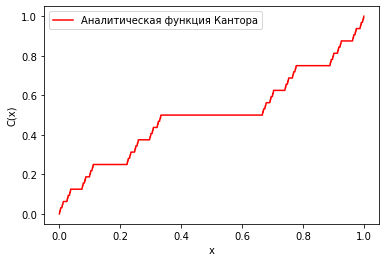

In [21]:
#иллюстрация работы функции cantor_vect
x = np.linspace(0, 1, n_plot)
y = cantor_vect(x)
plt.plot(x, y, c = 'r', label = 'Аналитическая функция Кантора')
plt.xlabel(r'x')
plt.ylabel(r'C(x)')
plt.legend()
plt.show()

## Проверка

Проверим правильность построения сингулярного распределения с помощью критерия Колмогорова.

#### Критерий Колмогорова:
Рассмотрим гипотезу $H_0$: пусть $F(x)$ - заданная функция распределения, $F_{n}(x)$ - эмпирическая функция распределения, построенная по имеющейся выборке. 

Пусть $D_n = \sup\limits_{x}|F(x) - F_n(x)|$, тогда гипотеза $H_0$ отклоняется с заданным уровнем согласия $\alpha$ тогда и только тогда, когда $\sqrt{n}D_n > \gamma$, где $\gamma = K^{-1}(1 - \alpha)$.  

Положим $\alpha = 5%$, тогда $\gamma = 1.36$ (согласно таблице).

In [22]:
#определение параметров
n_hyp = 100
n_sample = 1000

In [23]:
#критерий Колмогорова (для фиксированного alpha = 0.05)
#sample - выборка, fun - функция распределения
#возвращает T - гипотеза принимается, F - гипотеза отвергается
def kolmogorov(sample, fun):
    gamma = 1.36
    n_sample = sample.size
    ecdf = ECDF(sample)
    Dn = np.max(np.abs(ecdf(sample) - fun(sample)))
    return (Dn * np.sqrt(n_sample) <= gamma)

In [24]:
#проверка выполнения критерия Колмогорова
rejected = 0

for i in range(0, n_hyp):  
    if (~kolmogorov(sing(n_sample), cantor_vect)):
        rejected = rejected + 1
    
print('Отклонено ', rejected/n_hyp * 100, '% тестов.')

Отклонено  8.0 % тестов.


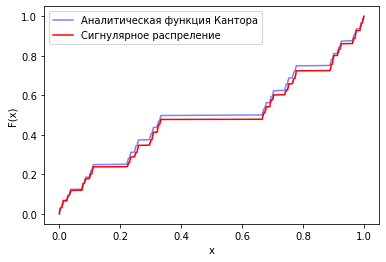

In [25]:
#иллюстрация характера сингулярного распределения
sample = np.sort(sing(n_sample))
ecdf = ECDF(sample)
plt.plot(sample, cantor_vect(sample), c = 'b', label = 'Аналитическая функция Кантора', alpha = 0.5)
plt.plot(sample, ecdf(sample), c = 'r', label = 'Сигнулярное распреление')
plt.xlabel(r'x')
plt.ylabel(r'F(x)')
plt.legend()
plt.show()

### 2. Для канторовых случайных величин проверить свойство симметричности относительно $\frac{1}{2}$ ($X$ и $1 - X$ распределены одинаково) и самоподобия относительно деления на $3$ с помощью критерия Смирнова.

## Симметричность распределения

Рассмотрим две выборки, $X_1 \sim \mathcal{Cant}\ (\mathcal{Cant}$ - сингулярное распределение с канторовой лестницей в качестве функции распределения) и $1 - X_2,\ X_2 \sim \mathcal{Cant}$. Покажем, с использованием критерия Смирнова, что $1 - X$ имеет такое же распределение. 

#### Критерий Смирнова:
Пусть $X_1$ и $X_2$ - две выборки. Рассмотрим гипотезу $H_0$: выборки имеют одинаковые распределения. Для проверки гипотезы введем $D_{mn} = \sup\limits_{x}|F_1(x) - F_2(x)|$, где $F_1(x)$ и $F_2(x)$ - эмпирические функции распределения на основе выборок $X_1$ и $X_2$ соответственно. Гипотеза отклоняется тогда и только тогда, когда $\left(\frac{mn}{m + n}\right)^{\frac{1}{2}}D_{mn} > \gamma$, где $\gamma = K^{-1}(1 - \alpha)$, $\alpha$ - уровень согласия.

Положим $\alpha = 5%$, тогда $\gamma = 1.36$.

In [26]:
#определение параметров
n_hyp = 100
n_sample = 1000

In [27]:
#критерий Смирнова
#принимает на вход исследуемые выборки sample1, sample2
#возвращает T - гипотеза принимается, F - гипотеза отвергается
def smirnov(sample1, sample2):
    gamma = 1.36
    n1 = sample1.size
    n2 = sample2.size
    ecdf1 = ECDF(sample1)  
    ecdf2 = ECDF(sample2)
    x = np.linspace(0, 1, max(n1, n2))
    Dn = np.max(np.abs(ecdf1(x) - ecdf2(x)))
    return(Dn * np.sqrt(n1 * n2 / (n1 + n2)) <= gamma)

In [28]:
#проверка работы критери Смирнова
rejected = 0

for i in range(0, n_hyp):
    x1 = sing(n_sample)    
    x2 = 1 - sing(n_sample)
    if (~smirnov(x1, x2)):
        rejected = rejected + 1
    
print('Отклонено ', rejected/n_hyp * 100, '% тестов.')

Отклонено  3.0 % тестов.


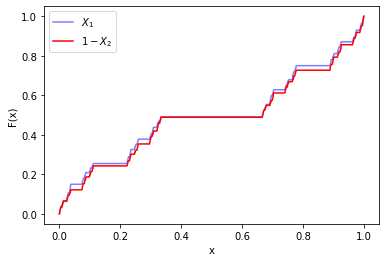

In [29]:
#иллюстрация симметричности распределения
x = np.linspace(0, 1, n_sample)
sample1 = sing(n_sample)    
sample2 = 1 - sing(n_sample)
ecdf1 = ECDF(sample1)  
ecdf2 = ECDF(sample2)

plt.plot(x, ecdf1(x), c = 'b', label = r'$X_1$', alpha = 0.5)
plt.plot(x, ecdf2(x), c = 'r', label = r'$1 - X_2$')
plt.xlabel(r'x')
plt.ylabel(r'F(x)')
plt.legend()
plt.show()

## Самоподобие распределения относительно деления на 3

Аналогично проверке на симметричность рассмотрим распределения $\frac{Y}{3}$ и условное распределение $Y$ при условии $Y \in [0, \frac{1}{3}]$.

In [30]:
#определение параметров
n_hyp = 100
n_sample = 1000

In [31]:
#проверка самоподобия
from statsmodels.distributions.empirical_distribution import ECDF

rejected = 0

for i in range(0, n_hyp):
    x1 = sing(n_sample)/3
    x2 = sing(n_sample * 2)
    x2 = x2[x2 <= 1/3]
    if (~smirnov(x1, x2)):
        rejected = rejected + 1
    
print('Отклонено ', rejected/n_hyp * 100, '% тестов.')

Отклонено  2.0 % тестов.


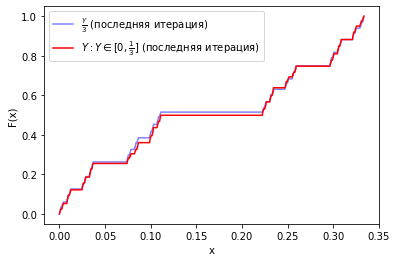

In [32]:
#иллюстрация самоподобия
x = np.linspace(0, 1/3, n_sample)
sample1 = sing(n_sample)/3
sample2 = sing(n_sample * 2)
sample2 = x2[x2 <= 1/3]
ecdf1 = ECDF(sample1)  
ecdf2 = ECDF(sample2)

plt.plot(x, ecdf1(x), c = 'b', label = r'$\frac{Y}{3}$ (последняя итерация)', alpha = 0.5)
plt.plot(x, ecdf2(x), c = 'r', label = r'$Y: Y \in [0, \frac{1}{3}]$ (последняя итерация)')
plt.xlabel(r'x')
plt.ylabel(r'F(x)')
plt.legend()
plt.show()

### 3. Вычислить значение математического ожидания и дисперсии для данного распределения. Сравнить теоретические значения с эмпирическими для разного объема выборок. Проиллюстрировать сходимость.

## Вычисление матожидания и дисперсии
Пусть $\xi \sim \mathcal{Cant}$, из симетричности распределения относительно $\frac{1}{2}$ следует, что $\mathbb{E}\xi = \frac{1}{2} \sim 0,5$.

Вычислим $\mathbb{E}\xi ^2 = \int\limits_0^1 x^2 dF(x) = \int\limits_0^{\frac{1}{3}} x^2 dF(x) + \int\limits_{\frac{2}{3}}^1 x^2 dF(x)$, используя свойство самоподобия получим, что $\mathbb{E}\xi^2 = \frac{3}{8}$.

Таким образом, $\mathbb{D}\xi = \frac{3}{8} - \frac{1}{4} = \frac{1}{8} \sim 0,125.$

## Эмпирические значения

In [33]:
#определение параметров
n_sample1 = 100
n_sample2 = 1000
n_sample3 = 100000

df = pd.DataFrame({
    'Матожидание': np.zeros(3),
    'Дисперсия': np.zeros(3)},
    index = {n_sample1, n_sample2, n_sample3})

In [34]:
#рассчеты матожидания и дисперсии
mean1 = np.mean(sing(n_sample1))
mean2 = np.mean(sing(n_sample2))
mean3 = np.mean(sing(n_sample3))

var1 = np.var(sing(n_sample1))
var2 = np.var(sing(n_sample2))
var3 = np.var(sing(n_sample3))

In [35]:
#вывод 
df.loc[n_sample1, 'Матожидание'] = mean1
df.loc[n_sample2, 'Матожидание'] = mean2
df.loc[n_sample3, 'Матожидание'] = mean3

df.loc[n_sample1, 'Дисперсия'] = var1
df.loc[n_sample2, 'Дисперсия'] = var2
df.loc[n_sample3, 'Дисперсия'] = var3

df

,Матожидание,Дисперсия
1000,0.498097,0.124434
100,0.499062,0.126839
100000,0.498602,0.124662


## Сходимость

Матожидание для каждого $n$ - числа случайных величин $X_n$ рассчитывается следующим образом: $$\mathbb{E}_n = \dfrac{1}{n}\sum\limits_{k = 1}^{n}X_k,$$
а дисперсия: $$\mathbb{D}_n = \dfrac{1}{n}\sum\limits_{k = 1}^{n}(X_k - \bar X)^2$$

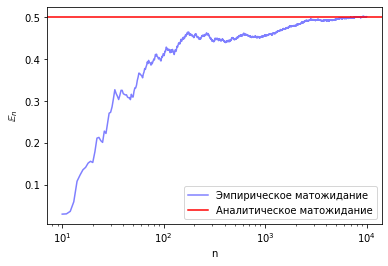

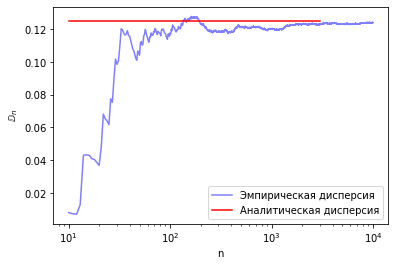

In [36]:
#иллюстрация результатов
n = 10000
m = 0.5
v = 0.125
ns = range(10, n)
means = np.zeros(n)
varss = np.zeros(n)

sample = sing(n)
means = np.cumsum(sample[ns]) / ns
varss = (np.cumsum(sample[ns]**2)) / ns - means**2
#var хз
#for i in range(0, n - 1):
 #   sample = sing(int(ns[i]))
    #means[i] = sample.mean()
  #  varss[i] = sample.var()

#логарифмические оси
plt.plot(ns, means, label = 'Эмпирическое матожидание', c = 'b', alpha = 0.5)
plt.axhline(m, c = 'r', label = 'Аналитическое матожидание')
plt.legend()
plt.xlabel(r'n')
plt.ylabel(r'$\mathbb{E}_n$')
plt.xscale('log')
plt.show()


plt.plot(ns, varss, label = 'Эмпирическая дисперсия', c = 'b', alpha = 0.5)
plt.plot([10, 3000], [v, v], c = 'r', label = 'Аналитическая дисперсия')
plt.xscale('log')
plt.xlabel(r'n')
plt.ylabel(r'$\mathbb{D}_n$')
plt.legend()
plt.show()

# Задание 3.
### 1. Построить датчик экспоненциального распределения. Проверить для данного распределения свойство отсутствия памяти. Пусть $X_1, ..., X_n$ - нзависимо экспоненциально распределенные с.в. с параметрами $\lambda_1, ..., \lambda_n$ соотвестственно. Найти распределение сучайной величины $Y = \min(X_1, ..., X_n).$

## Датчик экcпоненциального распределения

In [37]:
#датчик экспоненциального распределения размера size с параметром lam
def exp(lam, size):
    u = np.random.random_sample(size)
    return np.divide(-np.log(np.ones(size) - u), lam)

In [38]:
#определение параметров
lam = 4
size = 1000
n_plot = 1000

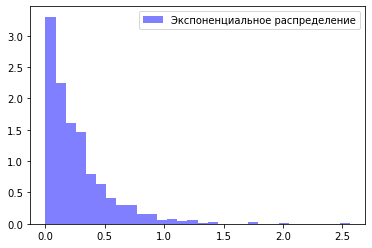

In [39]:
#иллюстрация работы датчика
plt.hist(exp(lam, size), density = True, bins = 30, label = 'Экспоненциальное распределение', color = 'b', alpha = 0.5)
x = np.linspace(0, 2, n_plot)
plt.legend()
plt.show()

## Проверка отсутствия памяти

In [40]:
#определение параметров
tau = 1
size = 10000

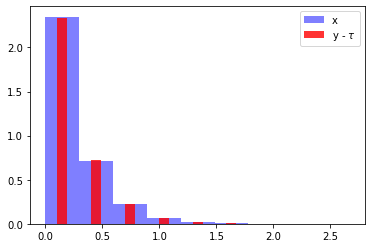

In [41]:
#проверка и иллюстрация свойства отсутствия памяти (наложение гистограмм)
x = exp(lam, size)
y = exp(lam, int(size * np.exp(lam * tau)))
y = y[y >= tau][0 : size]
plt.hist(x, bins = np.linspace(0, np.max(x), 10), density = True, alpha = 0.5, label = 'x', color = 'b')
plt.hist(y - tau, bins = np.linspace(0, np.max(x), 10), density = True, label = r'y - $\tau$', color = 'r', rwidth = 0.3, alpha = 0.8)
plt.legend()
plt.show()


## Распределение минимума 

Рассмотрим независимо экспоненциально распределенные величины $X_1, ..., X_n$ с параметрами $\lambda_1,...,\lambda_n$ соответственно.

Функция распределения $Y = \min(X_1, ..., X_n)$ вычисляется следующим образом:
$$F_y(x) = \mathbb{P}(\min(X_1,...,X_n) < x) = 1 - \prod\limits_{k = 1}^n (1 - F_{X_n}(x)) = 1 - e^{-\sum\limits_{i = 1}^{n}\lambda_i X_i},$$ то есть $Y \sim \mathcal{exp}(\sum\limits_{i = 1}^n \lambda_i).$

In [42]:
#определение параметров
n = 5
size = 10000

lam = (np.random.random_sample(n) * 10 + 1).astype(int)

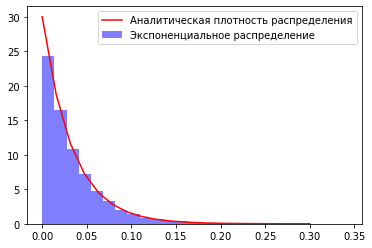

In [43]:
#иллюстрация распределения минимума
from statsmodels.distributions.empirical_distribution import ECDF

sample = np.zeros(n * size)
for i in range(0, n):
    sample[i * size : (i + 1) * size] = exp(lam[i], size)  
sample = np.reshape(sample, (n, size))
new_sample = sample.min(0)

x = np.linspace(0, 0.3, 20)

plt.hist(new_sample, density = True, bins = 25, label = 'Экспоненциальное распределение', color = 'b', alpha = 0.5)
plt.plot(x, lam.sum(0) *  np.exp(-1 * lam.sum(0) * x), label = 'Аналитическая плотность распределения', color = 'r')
plt.legend()
plt.show()

### 2. На основе датчика экспоненциального распределения построить датчик пуассоновского распределения.

## Пуассоновское распределение

Рассмотрим пуассоновский процесс $X(t)$ с интенсивностью $\lambda$. В момент времени $1$ $X(1)$ имеет пуассоновоское распределение с параметром $\lambda$. 

Также известно, что скачки в пуассоновском процессе распределены экспоненциально, то есть случайную величину $\eta \sim \mathcal{Pois}(\lambda)$  можно получить как индекс первой суммируемой
случайной величины $\xi_i \sim \mathcal{Exp}(\lambda)$ такой, что $$\sum\limits_{i = 1}^{\eta} \xi_i \geqslant 1.$$

In [44]:
#датчик пуассоновского размера size с параметром lam
def poisson_exp(lam, size):
    sum = 0
    res = np.zeros(size)
    for i in range(0, size):
        while (sum <= 1):
            sum = sum + exp(lam, 1)
            res[i] = res[i] + 1
        sum = 0
    return res

In [45]:
#определение параметров
lam = 10
size = 10000

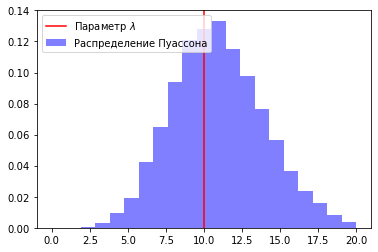

In [46]:
#иллюстрация работы датчика
plt.hist(poisson_exp(lam, size), range = (0, 20), bins = 21, label = 'Распределение Пуассона', color = 'b', alpha = 0.5, density = True)
plt.axvline(lam, c = 'r', label = r"Параметр $\lambda$")
plt.legend()
plt.show()

### 3. Построить датчик пуассоновского распределения как предел биномиального распределения. С помощью критерия хи-квадрат Пирсона убедиться, что получен датчик распределения Пуассона.

Для построения датчика Пуассоновского распределения воспользуемся теоремой Пуассона.

#### Теорема Пуассона:
Пусть проведено $n \rightarrow \infty$ испытаний Бернулли, причем $p_n \rightarrow 0$, а $np \rightarrow \lambda > 0$, тогда вероятность получить $k$ успехов в $n$ испытаниях Бернулли стремится к величине $\frac{\lambda^k e^{-\lambda}}{k!}$, причем $$\left| \sum\limits_k C_n^k p^k(1 - p)^{n-k} - \sum\limits_k \frac{\lambda^k}{k!}e^{-\lambda} \right| \leqslant np^2.$$

Выберем такой $\epsilon$, что $np^2 = \lambda p = \epsilon$ при заданном $\lambda$. Тогда $p = \frac{\epsilon}{\lambda},\ n = \frac{\lambda}{\epsilon}$. Положим $\epsilon = 10^{-3}.$

In [47]:
#датчик распределения Пуассона размера size с параметром lam
def poisson_binom(lam, size):
    eps = 10**(-3)
    p = eps / lam
    n = int(lam / p)
    return binom(p, n, size)

In [48]:
#определение параметров
lam = 10
size = 1000

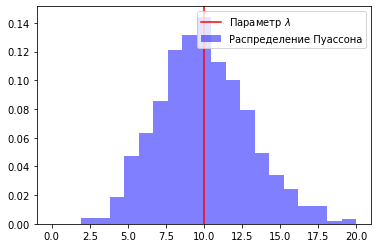

In [49]:
#иллюстрация работы датчика
plt.hist(poisson_binom(lam, size), range = (0, 20), bins = 21, label = 'Распределение Пуассона', color = 'b', alpha = 0.5, density = True)
plt.axvline(lam, c = 'r', label = r"Параметр $\lambda$")
plt.legend()
plt.show()

## Проверка

Для проверки правильности полученного распределения воспользуемся критерием хи-квадрат Пирсона.

#### Критерий хи-квадрат:
Рассмотрим выборку $X_1, ..., X_n,\ X_i \in [a, b]$ и соответствующую ей гипотезу $H_0$: случайные величины выборки распределены как $F(x)$. Разделим $[a,b]$ на $m$ непересекабщихся полуинтервалов.
Пусть $n_i$ - количество наблюдений, попавших в $i$-й полуинтервал. Пусть $p_j = F(b_j) - F(a_j)$ - вероятность попадания наблюдения в $j$-й интервал при функции распределения $F(x)$, тогда ожидаемое число наблюдений в $j$-м интервале равно $np_j$. Тогда $$Q = \sum\limits_{i = 1}^{m}\dfrac{(n_i - np_i)^2}{np_i} \rightarrow \chi ^2(m - 1), \quad n \rightarrow \infty.$$

Гипотеза $H_0$ отклоняется тогда и только тогда, когда $Q > \gamma$. Определим $\gamma = \chi _{m - 1}^{-1}(1 - \alpha)$.

In [50]:
#многомерная функция плотности распределения Пуассона размера k с парметром lam
def poisson_interval(lam, k):
    if type(k) == int:
        return np.exp(-lam) * (lam ** k) / np.prod(range(1, k + 1))
    n = len(k)
    res = np.zeros(n + 1)
    for i in range(0, k[0] + 1):
        res[0] = res[0] + np.exp(-lam) * (lam ** i) / np.prod(range(1, i + 1))
    for i in range(1, n):
        for j in range(k[i - 1] + 1, k[i] + 1):
            res[i] = res[i] + np.exp(-lam) * (lam ** j) / np.prod(range(1, j + 1))
    res[n] = 1 - np.sum(res)
    return res

In [51]:
def chi2_test(sample, x, ps, alpha):
    
    n = len(x)
    n_sample = sample.size
    gamma = chi2.ppf(1 - alpha, n - 1)
    
    ns = np.zeros(n + 1)
    for i in range(0, x[0] + 1):
        ns[0] = ns[0] + (sample == i).sum()
    for i in range(1, n):
        for j in range(x[i - 1] + 1, x[i] + 1):
            ns[i] = ns[i] + (sample == j).sum()
    ns[n] = n_sample - np.sum(ns)
    ns = ns.astype(int)    
    
    q = n_sample * np.sum(((ns/n_sample - ps) ** 2) / ps)
    return (q <= gamma)

In [52]:
#определение параметров
lam = 4
n_sample = 500

n_hyp = 100
alpha = 0.05

In [53]:
#проверка выполнения критерия хи-квадрат
rejected = 0

x = np.array([1, 2, 3, 4, 5, 6])
n = len(x)

ps = np.zeros(n + 1)
ps[0 : n + 1] = poisson_interval(lam, x[0 : n])

for i in range(0, n_hyp):
    sample = poisson_binom(lam, n_sample)
    if (~chi2_test(sample, x, ps, alpha)):
        rejected = rejected + 1
        
print('Отклонено ', rejected/n_hyp * 100, '% тестов.')

Отклонено  9.0 % тестов.



### 4. Построить датчик стандартного нормального распределения методом моделирования случайных величин парами с переходом в полярные коорадинаты. Проверить при помощи критерия t-критерия Стьюдента равенство математических ожиданий, а при помощи критерия Фишера равенство дисперсий.

В полярной системе координат построим точки, квадрат радиуса которых распределен экспоненциально с $\lambda = \frac{1}{2}$, а угол распределен равномерно. При переходе в декартову систему координат коорадинаты $x, y$ распределены равномерно.

In [54]:
#датчик нормального распределения размера size с параметрами mu, sigma
def normal(mu, sigma, size):
    phi = 2 * math.pi * np.random.random_sample(int(np.ceil(size/2)))
    r2 = exp(0.5, int(np.ceil(size/2)))
    x = np.sqrt(r2) * np.sin(phi)
    y = np.sqrt(r2) * np.cos(phi)
    return np.concatenate([x, y])[0:size] * sigma + mu

In [55]:
#определение параметров
mu = 0
sigma = 1
size = 10000

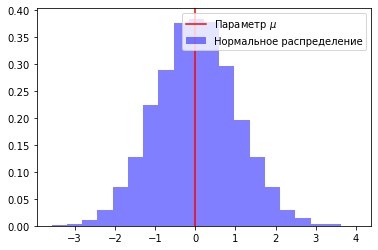

In [56]:
#иллюстрация работы датчика
plt.hist(normal(mu, sigma, size), bins = 20, label = 'Нормальное распределение', density=True, color = 'b', alpha = 0.5)
x = np.linspace(-4, 4, 1000)
#plt.plot(x, 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2), color = 'r')
plt.axvline(mu, c = 'r', label = r"Параметр $\mu$")
plt.legend()
plt.show()

## Проверка матожидания

Для проверки правильности постоенного распределения воспользуется t-критерием Стьюдента.

#### T-критерий Стьюдента

Пусть $X$ - выборка, эмпирическое распределение, рассмотрим гипотезу $H_0$ согласно которой элементы выборки распределены нормально со средним $\mu$. Пусть $$\sigma'  = \sqrt{\frac{1}{n - 1} \sum\limits_i (X_i - \bar X)^2}, \quad U = \sqrt{n} \dfrac{\bar X - \mu}{\sigma'}.$$
Тогда гипотеза $H_0$ отвергается тогда и только тогда, когда $|U| > \gamma,\ \gamma = T^{-1}(1 - \frac{\alpha}{2}),$ где $\alpha$ - уровень солгасия.

In [57]:
#критерий Стьюдента
#принимает на вход выборку sample и предполагаемое среднее mu
#возвращает T - гипотеза принимается, F - гипотеза отклоняется
def student_test(sample, mu, alpha):
    gamma = t.ppf(1 - alpha / 2, size - 1)
    
    n_sample = sample.size
    mean = sample.mean()
    
    s = np.sqrt(np.sum((sample - mean) ** 2) / (n_sample - 1))
    u = np.abs(np.sqrt(n_sample) * (mean - mu) / s)
    return (abs(u) <= gamma)

In [58]:
#определение параметров
n_hyp = 100
alpha = 0.05

mu = 1
sigma = 2
n_sample = 1000

In [59]:
#проверка выполнения критерия
from scipy.stats import t

rejected = 0

for i in range(0, n_hyp):
    sample = normal(mu, sigma, n_sample)
    
    if (~student_test(sample, mu, alpha)):
        rejected = rejected + 1
        
print('Отклонено ', rejected/n_hyp * 100, '% тестов.')

Отклонено  3.0 % тестов.


##  Проверка равенства дисперсий

Рассмотрим построенное распределение и нормальное распределение с одинаковыми параметрами. С помощью критерия Фишера проверим равенство дисперсий выборок, полученных разными способами.

#### Критерий Фишера:

Пусть $X_1$ и $X_2$ - выборки размера $m$ и $n$ соответственно Рассмотрим следующую гипотезу $H_0$: дисперсии выборок равны. Пусть $$V = \dfrac{\sum\limits_i (X_i - \bar X)^2 (n - 1)}{(m - 1)\sum\limits_i (Y_i - \bar Y)^2}.$$
Гипотеза $H_0$ принимается при $V \in [\gamma_1, \gamma_2],$ где $\gamma_1 = F_{(n - 1)(m - 1)}^{-1}\left(\dfrac{\alpha}{2}\right),$ а $\gamma_2 = F_{(n - 1)(m - 1)}^{-1}\left(1 - \dfrac{\alpha}{2}\right).$

In [60]:
def fisher_test(sample1, sample2, alpha):
    n1 = sample1.size
    n2 = sample2.size
    
    gamma1 = f.ppf(alpha / 2, n2 - 1, n1 - 1)
    gamma2 = f.ppf(1 - alpha / 2, n2 - 1, n1 - 1)
    V = sample1.var() * (n2 - 1) / sample2.var() / (n1 - 1)
    return (V <= gamma2) and (V >= gamma1)
        

In [61]:
#определение параметров
n_hyp = 100
alpha = 0.05

mu = 0
sigma = 1
size = 1000

In [62]:
#проверка выполнения критерия Фишера

rejected = 0

for i in range(0, n_hyp):
    sample1 = normal(mu, sigma, size)
    sample2 = np.random.randn(size)
    if (~fisher_test(sample1, sample2, alpha)):
        rejected = rejected + 1
        
print('Отклонено ', rejected/n_hyp * 100, '% тестов.')

Отклонено  2.0 % тестов.


# Задание 4.
### 1. Построить датчик распределения Коши.

Построим датчик распределения Коши с использованием равномерного распределения. Пусть $X \sim \mathcal{U}[0, 1]$, тогда $\tan(\pi (X - \frac{1}{2})) \sim \mathcal{C}(0, 1)$. Для получения распределения Коши с параметрами $x_0, \gamma$ воспользуемся формулой $X_1 = \gamma X_0 + x_0,$ где $X_1 \sim \mathcal{C}(x_0, \gamma),\ X_0 \sim \mathcal{C}(0, 1)$

In [63]:
#датчик распределения Коши
def cauchy(x_0, gamma, size):
    sample = np.random.random_sample(size)
    return gamma * (np.tan(np.pi * (sample - 0.5))) + x_0

In [64]:
#определение параметров
x_0 = 0
gamma = 3
size = 10000

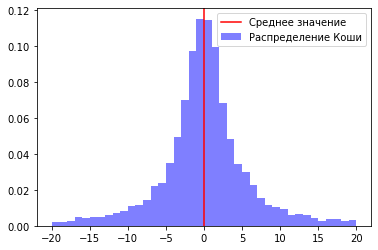

In [65]:
#иллюстрация работы датчика
x = np.linspace(-20, 20, size)
#plt.plot(x, 1 / np.pi / gamma / (1 + ((x - x_0)/gamma)**2), color = 'r')
plt.hist(cauchy(x_0, gamma, size), label = 'Распределение Коши', range = (-20, 20), alpha = 0.5, color = 'b', density = True, bins = 40)
plt.axvline(x_0, c = 'r', label = "Среднее значение")
plt.legend()
plt.show()

### 2. На основе датчика распределения Коши с помощью метода фон Неймана построить датчик стандартного нормального распределения. При помощи функции normal probability plot убедиться в корректности построенного датчика и обосновать наблюдаемоую линейную зависимость.

Рассмотрим генератор распределения Коши и построим по нему стандартное нормальное распределение. 

Пусть $c(x)$ - плотность распрелеоения Коши, $n(x)$ - плотность стандартного нормального распределения. 

Введем $k$ такое, что $\dfrac{n(x)}{c(x)} \leqslant k$.

Воспользуемся следующим алгоритмом:
1.  сгенерируем $X \sim \mathcal{C}(0, 1),\ Y \sim \mathcal{U}[0, 1]$;
2. рассмотрим неравенство $\dfrac{n(X)}{c(X)} \leqslant k U$: если оно выполнено, то $X \sim \mathcal{N}(0, 1)$, иначе - нет.

Выберем подходящее $k$. 
$$h(x) = \dfrac{n(x)}{c(x)} = \sqrt{\dfrac{\pi}{2}}\dfrac{e^{-\frac{x^2}{2}}(x^2 + \gamma^2)}{\gamma},$$ минимум функции достигается при $\gamma = 1$, при этом $h(1) = \sqrt{2\pi}e^{-\frac{1}{2}} = k$.

In [66]:
#датчик нормального распределения
def normal_cauchy(mu, sigma, size):
    k = np.sqrt(2*np.pi) * np.exp(-0.5)
    res = []
    while (len(res) < size):
        c = cauchy(0, 1, 2 * size)
        u = np.random.random_sample(2 * size)
        res = np.concatenate([res, c[np.sqrt(np.pi / 2) * np.exp(-(c ** 2) / 2) * (c ** 2 + 1) > k * u]])
    return sigma * res + mu

In [67]:
#определение параметров
mu = 0
sigma = 1
size = 10000

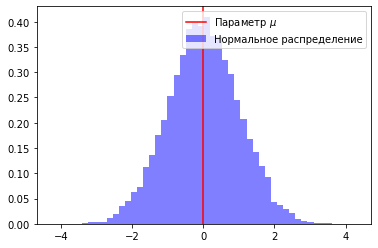

In [68]:
#иллюстрация работы датчика
x = np.linspace(-4, 4, 1000)
#plt.plot(x, 1 / (np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2), color = 'r')
plt.hist(normal_cauchy(mu, sigma, size), bins = 50, label = 'Нормальное распределение', density=True, color = 'b', alpha = 0.5)
plt.axvline(mu, c = 'r', label = r"Параметр $\mu$")
plt.legend()
plt.show()

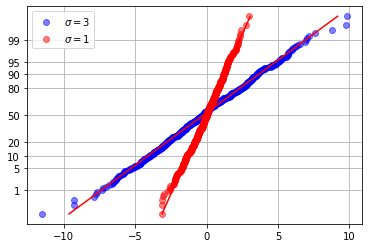

In [69]:
#проверка корреткности работы датчика
from scipy import stats

samp = normal_cauchy(0, 1, 500)
(quants, vals), (slope, inter, r) = stats.probplot(samp, dist='norm')

samp2 = normal_cauchy(0, 3, 500)
(quants2, vals2), (slope2, inter2, r2) = stats.probplot(samp2, dist='norm')

plt.plot(vals2, quants2, 'o', label=r'$\sigma=3$', color = 'b', alpha = 0.5)
plt.plot(quants2 * slope2 + inter2, quants2, 'r')

plt.plot(vals, quants, 'o', label=r'$\sigma=1$', color = 'r', alpha = 0.5
        )
plt.plot(quants * slope + inter, quants, 'r')

ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
plt.yticks(ticks_quan,ticks_perc)

plt.legend()
plt.grid()
plt.show()

### 3. Сравнить скорость моделирования стандартного нормального распределения в заданиях 3 и 4.

In [70]:
#определение параметров
n = 10
p = np.logspace(2, 6, 10)

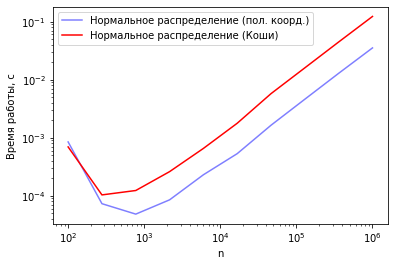

In [71]:
#сравнение времени работы
from time import time

T1 = np.zeros((n, len(p)))
T2 = np.zeros((n, len(p)))

for i in range(0, n):
    for j in range(0, len(p)):
        t = time()
        a = normal(0, 1, p[j].astype(int))
        T1[i, j] = time() - t

t1 = np.median(T1, 0)

for i in range(0, n):
    for j in range(0, len(p)):
        t = time()
        a = normal_cauchy(0, 1, p[j].astype(int))
        T2[i, j] = time() - t

t2 = np.median(T2, 0)

plt.plot(p, t1, color = 'b', alpha = 0.5, label = 'Нормальное распределение (пол. коорд.)')
plt.plot(p, t2, color = 'r', label = 'Нормальное распределение (Коши)')
plt.legend()
plt.xlabel(r'n')
plt.ylabel(r'Время работы, с')
plt.yscale('log')
plt.xscale('log')
plt.show()

# Задание 5.

### 1. Пусть $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Убедиться эмпирически в справедливости ЗБЧ и ЦПТ, т.е. исследовать поведение суммы $S_n$ и эмпирического распределения величины $$\sqrt{n}\left(\dfrac{S_n}{n} - \mu \right).$$

## Проверка ЗБЧ

В случае выполнения закона больших чисел, $\dfrac{S_n}{n} \rightarrow \mu$ или $S_n \rightarrow n \mu$.

In [72]:
#определение параметров
mu = 1
sigma = 1
n = 10000

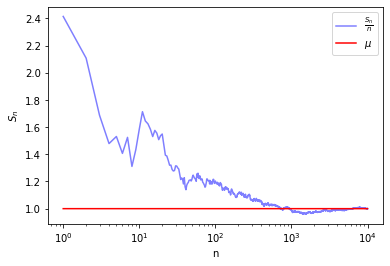

In [73]:
#проверка ЗБЧ
x = np.ones(n).cumsum()
sample = normal(mu, sigma**2, n)
Sn = np.cumsum(sample)
plt.plot(x, Sn / x, color = 'b', alpha = 0.5, label = r'$\frac{S_n}{n}$')
plt.plot(x, mu * np.ones(n), color = 'r', label = r'$\mu$')
plt.xlabel(r'n')
plt.xscale('log')
plt.ylabel(r'$S_n$')
plt.legend()
plt.show()

## Проверка ЦПТ

Покажем, что $\sqrt{n}\left(\dfrac{S_n}{n} - \mu \right)$ распределено нормально с параметрами 0, $\sigma$.

In [74]:
#определение параметров
mu = 3
sigma = 2
n = 10000
n_sample = 10000

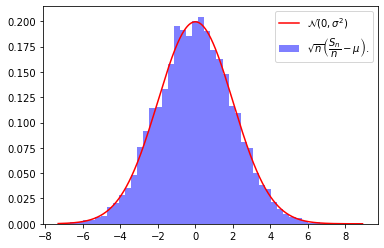

In [75]:
#проверка ЦПТ

sample = np.zeros(n)

sample = np.sqrt(n) * (np.reshape(normal(mu, sigma, n * n_sample), (n, n_sample)).sum(1) / n - mu)

x = np.linspace(min(sample), max(sample), n_sample)    
plt.hist(sample,  bins = 50, label = r'$\sqrt{n}\left(\dfrac{S_n}{n} - \mu \right).$', density=True, color = 'b', alpha = 0.5)
plt.plot(x, norm.pdf(x / sigma) / sigma, color = 'r', label = r'$\mathcal{N}(0, \sigma^2)$')
plt.legend()
plt.show()

### 2. Считая $\mu$ и $\sigma$ неизвестными, для пункта 1 построить доверительне интервалы для среднего и дисперсии.

## Доверительный интервал для матожидания

Известно, что $$U = \sqrt{n} \dfrac{\bar X - \mu}{\sigma'} \sim \mathcal{St}(n - 1),$$ где $\sigma' = \dfrac{1}{n - 1} \sum (X_i - \bar X)^2$.

Тогда $$\mathbb{P}(\gamma_1 < U < \gamma_2) = \mathbb{P}\left(\bar X - \dfrac{\sigma' \gamma_2}{\sqrt{n}} < \mu < \bar X - \dfrac{\sigma' \gamma_1}{\sqrt{n}}\right) = 1 - \alpha = T(\gamma_2) - T(\gamma_1),$$
где $T(x)$ - функция распределения Стьюдента с $n - 1$ степенями свободы.

Таким образом, $\gamma_1 = T^{-1}(\frac{\alpha}{2}),\ \gamma_2 = T^{-1}(1 - \frac{\alpha}{2})$, а $\mu$ лежит в интервале $\left(\bar X - \dfrac{\sigma' \gamma_2}{\sqrt{n}}, \bar X - \dfrac{\sigma' \gamma_1}{\sqrt{n}}\right)$.

In [76]:
#определение параметров
mu = 0
sigma = 1
size = 1000

alpha = 0.05
n_hyp = 100

In [77]:
#проверка доверительного интервала
from scipy.stats import t

rejected = 0

gamma1 = t.ppf(alpha / 2, size - 1)
gamma2 = t.ppf(1 - alpha / 2, size - 1)

for i in range(1, n_hyp):
    sample = normal(mu, sigma**2, size)
    mean = sample.mean()
    s = np.sqrt(np.sum((sample - mean) ** 2) / (size - 1))
    if (mu < mean - s * gamma2 / np.sqrt(size)) or (mu > mean - s * gamma1 / np.sqrt(size)):
        rejected = rejected + 1

print('Неверный интервал в ', rejected/n_hyp * 100, '% тестов.')

Неверный интервал в  4.0 % тестов.


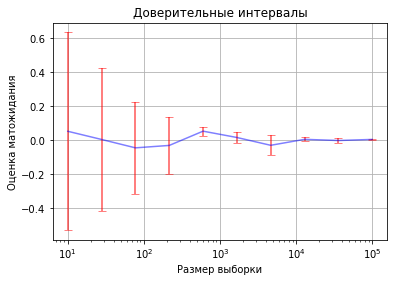

In [78]:
N = 10
n_sample = np.logspace(1, 5, N)
means = np.zeros(N)
outs = np.zeros((2, N))

for i, n in enumerate(n_sample):
    size = int(n)
    sample = normal(mu, sigma, size)
    s = np.sqrt(sample.var() * size / (size - 1))
    gamma1 = t.ppf(alpha / 2, size - 1)
    gamma2 = t.ppf(1 - alpha / 2, size - 1)
    means[i] = sample.mean()
    outs[0, i] = means[i] - gamma2 * s / np.sqrt(size)
    outs[1, i] = means[i] + gamma1 * s / np.sqrt(size)
    
fig, ax = plt.subplots()
ax.errorbar(n_sample, means, outs, capsize=4, elinewidth=2, ecolor='r', color='b', alpha = 0.5)
ax.set_xscale('log')
ax.set_xlabel('Размер выборки')
ax.set_ylabel('Оценка матожидания')
ax.set_title('Доверительные интервалы')
ax.grid()

## Доверительный интервал для дисперсии

Известно, что $$V = \dfrac{\sum\limits_{i = 1}^{n} (X_i - \bar X)^2}{\sigma^2} \sim \chi^2(n - 1).$$

Тогда $$\mathbb{P}(\gamma_1 < V < \gamma_2) = \mathbb{P}\left(\dfrac{\sum (X_i - \bar X)^2}{\gamma_2} < \sigma^2 < \dfrac{\sum (X_i - \bar X)^2}{\gamma_1}\right) = 1 - \alpha = \chi(\gamma_2) - \chi(\gamma_1).$$

Таким образом, $\gamma_1 = \chi^{-1}(\frac{\alpha}{2}),\ \gamma_2 = \chi^{-1}(1 - \frac{\alpha}{2})$, а $\sigma^2 \in \left(\dfrac{\sum (X_i - \bar X)^2}{\gamma_2}, \dfrac{\sum (X_i - \bar X)^2}{\gamma_1} \right)$

In [79]:
#определение параметров
mu = 0
sigma = 1
size = 1000

alpha = 0.05
n_hyp = 100

In [80]:
#проверка доверительного интервала
rejected = 0

gamma1 = chi2.ppf(alpha / 2, size - 1)
gamma2 = chi2.ppf(1 - alpha / 2, size - 1)

for i in range(1, n_hyp):
    sample = normal(mu, sigma**2, size)
    if (sigma**2 < size * sample.var() / gamma2) or (sigma**2 > size * sample.var() / gamma1):
        rejected = rejected + 1

print('Параметр лежит в доверительном интервале в ', rejected/n_hyp * 100, '% тестов.')

Параметр лежит в доверительном интервале в  5.0 % тестов.


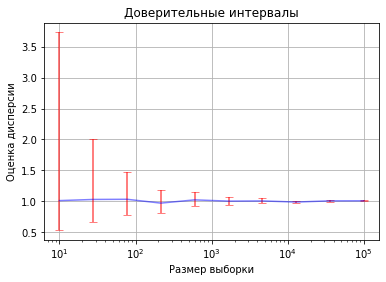

In [81]:
N = 10
n_sample = np.logspace(1, 5, N)
outs = np.zeros((2, N))
varss = np.zeros(N)

for i, n in enumerate(n_sample):
    sample = normal(mu, sigma, int(n))
    gamma1 = chi2.ppf(alpha / 2, int(n) - 1)
    gamma2 = chi2.ppf(1 - alpha / 2, int(n) - 1)
    varss[i] = sample.var()
    outs[0, i] = varss[i] - int(n) * sample.var() / gamma2
    outs[1, i] = int(n) * sample.var() / gamma1 - varss[i]

fig, ax = plt.subplots()
ax.errorbar(n_sample, varss, yerr=outs, capsize=4, elinewidth=2, ecolor='r', color='b', alpha = 0.5)
ax.set_xscale('log')
ax.set_xlabel('Размер выборки')
ax.set_ylabel('Оценка дисперсии')
ax.set_title('Доверительные интервалы')
ax.grid()

### 3. Пусть $X_i \sim \mathcal{C}(x_0, \gamma)$ имеет распределение Коши со сдвигом $x_0$ и масштабом $\gamma$. Проверить эмпирически, как ведут себя суммы $\frac{S_n}{n}$. Результат объяснить, а также найти закон распределения данных сумм.

Так как распределение Коши не имеет матожидания, то из усиленного закона больших  чисел следует, что $S_n \rightarrow n \mu$ не выполняется.

In [82]:
#определение параметров
x_0 = 1
gamma = 1
n = 5000

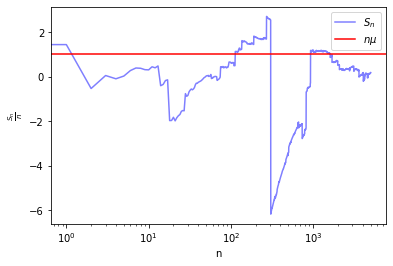

In [93]:
#проверка выполнения закона больших чисел
x = np.ones(n).cumsum()

sample = cauchy(x_0, gamma, n)
Sn = np.cumsum(sample)

plt.plot(Sn/x, color = 'b', alpha = 0.5, label = r'$S_n$')
plt.axhline(x_0, color = 'r', label = r'$n \mu$')
plt.xlabel(r'n')
plt.ylabel(r'$\frac{S_n}{n}$')
plt.xscale('log')
plt.legend()
plt.show()

## Закон распределения сумм

In [94]:
#определение параметров
x_0 = 0
gamma = 3
n = 1000
size = 10000

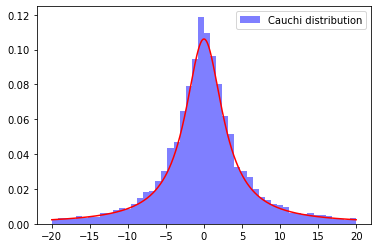

In [95]:
#иллюстрация распределения Коши
x = np.linspace(-20, 20, size)
plt.plot(x, 1 / np.pi / gamma / (1 + ((x - x_0)/gamma)**2), color = 'r')
plt.hist(cauchy(x_0, gamma, (n, size)).sum(0) / n, label = 'Cauchi distribution', range = (-20, 20), alpha = 0.5, color = 'b', density = True, bins = 50)
plt.legend()
plt.show()

Эмпирически получено, что $\frac{S_n}{n} \sim \mathcal{C}(x_0, \gamma)$. Покажем, что это действительно так. Для этого рассмотрим характеристическую функцию распределения Коши:
$$\varphi(t) = \mathbb{E}e^{it\xi} = \dfrac{1}{\pi}\int\dfrac{\gamma e^{itx}}{(x - x_0)^2 + \gamma^2}dx = e^{itx_0 - |t|\gamma}.$$

Известно также, что из $\xi \sim \varphi$ следует $\sum\limits_{k = 1}^{n}\xi_k = \varphi^n$. Тогда $$\varphi_{\frac{S_n}{n}}(t) = \left[\varphi\left(\frac{t}{n}\right)\right]^n = e^{itx_0 - |t|\gamma},$$
то есть $\dfrac{S_n}{n} \sim \mathcal{C}(x_0, \gamma).$

# Задание 6.

### 1. Посчитать интеграл $$I = \int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}\ldots\int\limits_{-\infty}^{\infty}\dfrac{e^{-\left(x_1^2 + \ldots + x_{10}^2 + \frac{1}{2^7 \cdot x_1^2 \cdot \ldots\cdot x_{10}^2}\right)}}{x_1^2 \cdot \ldots \cdot x_{10}^2}dx_1dx_2\ldots dx_{10}$$
- методом Монте-Карло;
- методом квадратур, сводя задачу к вычислению собственного интеграла Римана.

## Метод Монте-Карло

Представим интеграл в виде матожидания от некоторого десятимерного распределения. 

Заметим, что плотность десятимерного нормального распределения параметрами $\mu = 0,\ \sigma^2 = \frac{1}{2}$ выглядит следующим образом:
$$p(x) = \dfrac{1}{\pi^5}e^{-\sum x_k^2}.$$
Тогда интеграл $I$ можно преддставить в виде:
$$I = \pi^5 \int\limits_{-\infty}^{\infty}\int\limits_{-\infty}^{\infty}\ldots\int\limits_{-\infty}^{\infty} y e^{-\frac{y}{2^7}}p(x)dx = \pi^5 \mathbb{E}\left[y e^{-\frac{y}{128}}\right] \approx \pi^5 \dfrac{1}{n} \sum\limits_{k = 1}^{n}y_k e^{-\frac{y_k}{128}},$$
где $X_j^{(k)} \sim \mathcal{N}\left(0, \frac{1}{2}\right),\ j = 1,\ldots, 10,\ k = 1, \ldots, n;\ y_k = \left[ \prod\limits_{j = 1}^{10} X_j^{(k)}\right]^{-2}.$

In [ ]:
#метод Монте-Карло
n = 10**(8)
y = (np.reshape(normal(0, np.sqrt(0.5), 10 * n), (10, n)).prod(0)) ** (-2)
res = (np.pi ** 5) * (y * np.exp(-y / 128)).mean()
print(res)

## Метод квадратур

Введем замену $$x_i = \tan y_i \Rightarrow dx_i = \frac{1}{\cos^2 y_i}dy_i,\quad i = 1,\ldots,10.$$


При такой замене интеграл $I$ примет вид:$$I =  \int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \ldots \int\limits_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \prod \dfrac{1}{\sin^2 y_k} \exp\left\{-\sum \tan^2 y_k - \frac{1}{128} \prod \cot^2 y_k \right\} dy_1 \ldots dy_{10}.$$

Заметим, что интеграл четный, значит можно рассматривать отрезки $[0, \frac{\pi}{2}]$, при этом необходимо домножить полученный результат на $2^{10}$, то есть удвоить по каждому измерению.
Разобьем каждый из $10$ отрезков $[0, \frac{\pi}{2}]$ на $m$ равных подынтервалов, в каждом подынтервале выберем среднее значение и получим сетку из $m - 1$ элементов по каждому разряду. Сопоставим каждой точке на интервале ее порядковый номер (от $1$ до $m - 1$).

Заметим, что подынтегральная функция симметрична по всем аргументам, а значит, можно перебирать не все возможные комбинации точек, а только те, номера которых упорядочены и не убывают. Такие комбинации определяются в функции get_ii(), принимающей на вход предыдущую возможную (стартовая - все нули) последовательность.

Назовем весом количество комбинаций, которые приводятся к рассматриваемой при упорядочивании элементов. Для того, чтобы учесть все обобщаемые точки, необходимо умножить значения функций в этих точках на их вес. 
Для вычисления весов каждой из комбинаций воспользуемся формулой:

$$w = \dfrac{n!}{n_1!\cdot\ldots n_{m - 1}!},$$
где $n_i$ - количество элементов в строке, принимающих значение $i$, $i = 1,\ldots,m$.

Полученная сумма умножается на $h^{10} = \left[\dfrac{\pi}{2m}\right]^{10}$, затем на $2^{10}$, упрощая, получим коэффициент $(2h)^{10}$. 

Таким образом, интеграл вычисляется многомерным методом прямоугольников, а выбор точек специального вида позволяет упростить вычисления.

In [ ]:
#рассчет факториала
def fact(n):   
    if (n == 0):
        return 1
    return np.prod(range(1, n + 1))

In [ ]:
#определение веса комбинации
def coef(ns): 
    ns = ns[ns != 0]
    res = fact(ns.sum())
    for i in range(0, len(ns)):
        res = res / fact(ns[i])
    return res

In [ ]:
#подынтеральная функция
def fun(y): 
    tans = np.tan(y) ** 2
    return np.exp(-tans.sum() - np.prod(1 / tans) / 128) * np.prod(1 / (np.sin(y))**2)

In [ ]:
#определение индексов
def get_ii(s, m):
    for i in range(-1, -len(s) - 1, -1):
        if (s[i] < m - 1):
            s[i:] = (s[i] + 1) * np.ones(np.shape(s[i:]))
            return s.astype(int)
    return -1

In [ ]:
#метод квадратур
m = 12
n = 10

res = 0

h = np.pi / 2 / m
x = [0 + h * (i + 0.5) for i in range(0, m)]

ii = np.zeros(n)

while 1:
    ii = get_ii(ii, m)
    if (np.prod(ii == -1)):
        break
    ns = np.array([np.array((ii == i)).astype(int).sum() for i in range(0, m)])
    res += coef(ns) * fun(np.array([x[i] for i in ii]))
res = res * ((2 * h) ** 10)
print(res)

### 2. Для каждого случая оценить точность вычислений.

## Метод Монте-Карло

Для оценки ошибки $\varepsilon$ на выборке размера $n$ с уровнем доеврия $\alpha$ воспользуемся неравенством Чебышева:
$$\mathbb{P} \left( \left| \dfrac{1}{n} \sum\limits_{i = 1}^{n} f(Y_i) - \mathbb{E} [f(Y)] \right| \geqslant \varepsilon \right) \leqslant \mathbb{D}\dfrac{[f(Y)]}{n \varepsilon^2} = \alpha.$$
В качестве $\mathbb{D}[f(Y)]$ используем выборочную дисперсию. Положим $\alpha = 5$%, $n = 10^{5}$.

In [ ]:
n = 10**7
alpha = 0.05
y = (np.reshape(normal(0, 1 / np.sqrt(2), 10 * n), (10, n)).prod(0)) ** (-2)
var = (np.pi ** 5 * y * np.exp(-y / 128)).var()
res = np.sqrt(var / n / alpha)
print(res)

## Метод квадратур

Для оценки погрешности воспрользуемся разложением подынтегральной функции $f(x)$ в ряд Тейлора до первого члена:
$$f(x) = f(x_0) + \langle \nabla f(\xi), \Delta x\rangle,$$
где $x_0$ - центр десятимерного гиперкуба $\Delta$, а $\xi$ лежит в нем.

Тогда погрешность по каждому из измерений составляет:
$$\int\limits_{\Delta} \langle \nabla f(\xi), \Delta x \rangle \leqslant \sup\limits_{\Delta}\| \nabla f(x) \| \|\Delta x\| \mu(\Delta) \leqslant \dfrac{\sqrt{n}}{2}h^{n + 1} \sup\limits_{\left[ -\frac{\pi}{2}, \frac{\pi}{2}\right]} \|\nabla f(x)\|,$$
а общая ошибка не превосходит $\dfrac{\pi^n h \sqrt{n}}{2} \sup\limits_{\left[ -\frac{\pi}{2}, \frac{\pi}{2} \right]} \|\nabla f(x)\|$. 

Ошибка убывает линейно по $h$, однако для достижения маленькой ошибки необходима большая вычислительная мощность.